## Assignment 3 - Fitting

**D/ENG/21/0108/EE**  
**M.W.M Shakir**

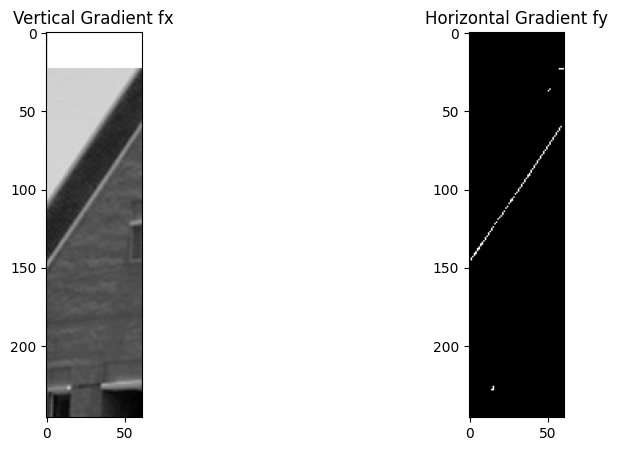

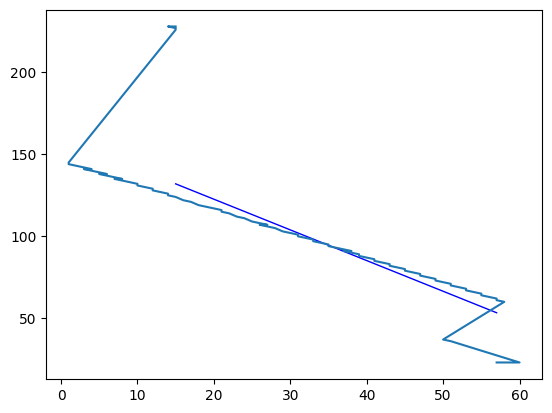

In [19]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('Images/building_crop.jpg', cv.IMREAD_GRAYSCALE)


edges = cv.Canny(img, 370 , 400)
indices = np.where(edges != [0])

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img, cmap='gray')
axs[0].set_title("Vertical Gradient fx")
axs[1].imshow(edges.astype('uint8'), cmap='gray')
axs[1].set_title("Horizontal Gradient fy")

plt.show()

x = indices[1]
y = indices[0]


n = len(x)

X = np.concatenate([x.reshape(n,1), np.ones((n, 1))], axis=1)
B = np.linalg.pinv(X.T @ X) @ X.T @ y
mstar_LS = B[0]
cstar_LS = B[1]

plt.plot([x[0], x[-1]], [mstar_LS*x[0] + cstar_LS, mstar_LS*x[-1] + cstar_LS], color='b', linewidth=1, label=r'Estimated line (LS)')
plt.plot(x,y)
